# **The Prototype Model for Legitimate and Ethical Decision Making by Autonomous AI Systems in Corporate Management**

# Prototype Case #2

**This prototype demonstrates the Model for making legitimate and ethical decisions by autonomous AI systems in corporate management.**

The notebook shows how the Model can be used to demonstrate an autonomous AI system approach monitoring and controlling management decisions. The presented workflow is based on the computational law, dedicated operational context, controllable generation of synthetic data, decision making process based on the game theory, and decision argumentation based on explainable AI.

Data from the Enron dataset is used in this notebook. See the Section 2 below for more details.

**The Model**

The proposed model for the development and implementation of autonomous AI systems is based on the synthesis of computational law, a dedicated operational context, controllable generation of synthetic data, machine learning algorithms, the game theory, and explainable AI.


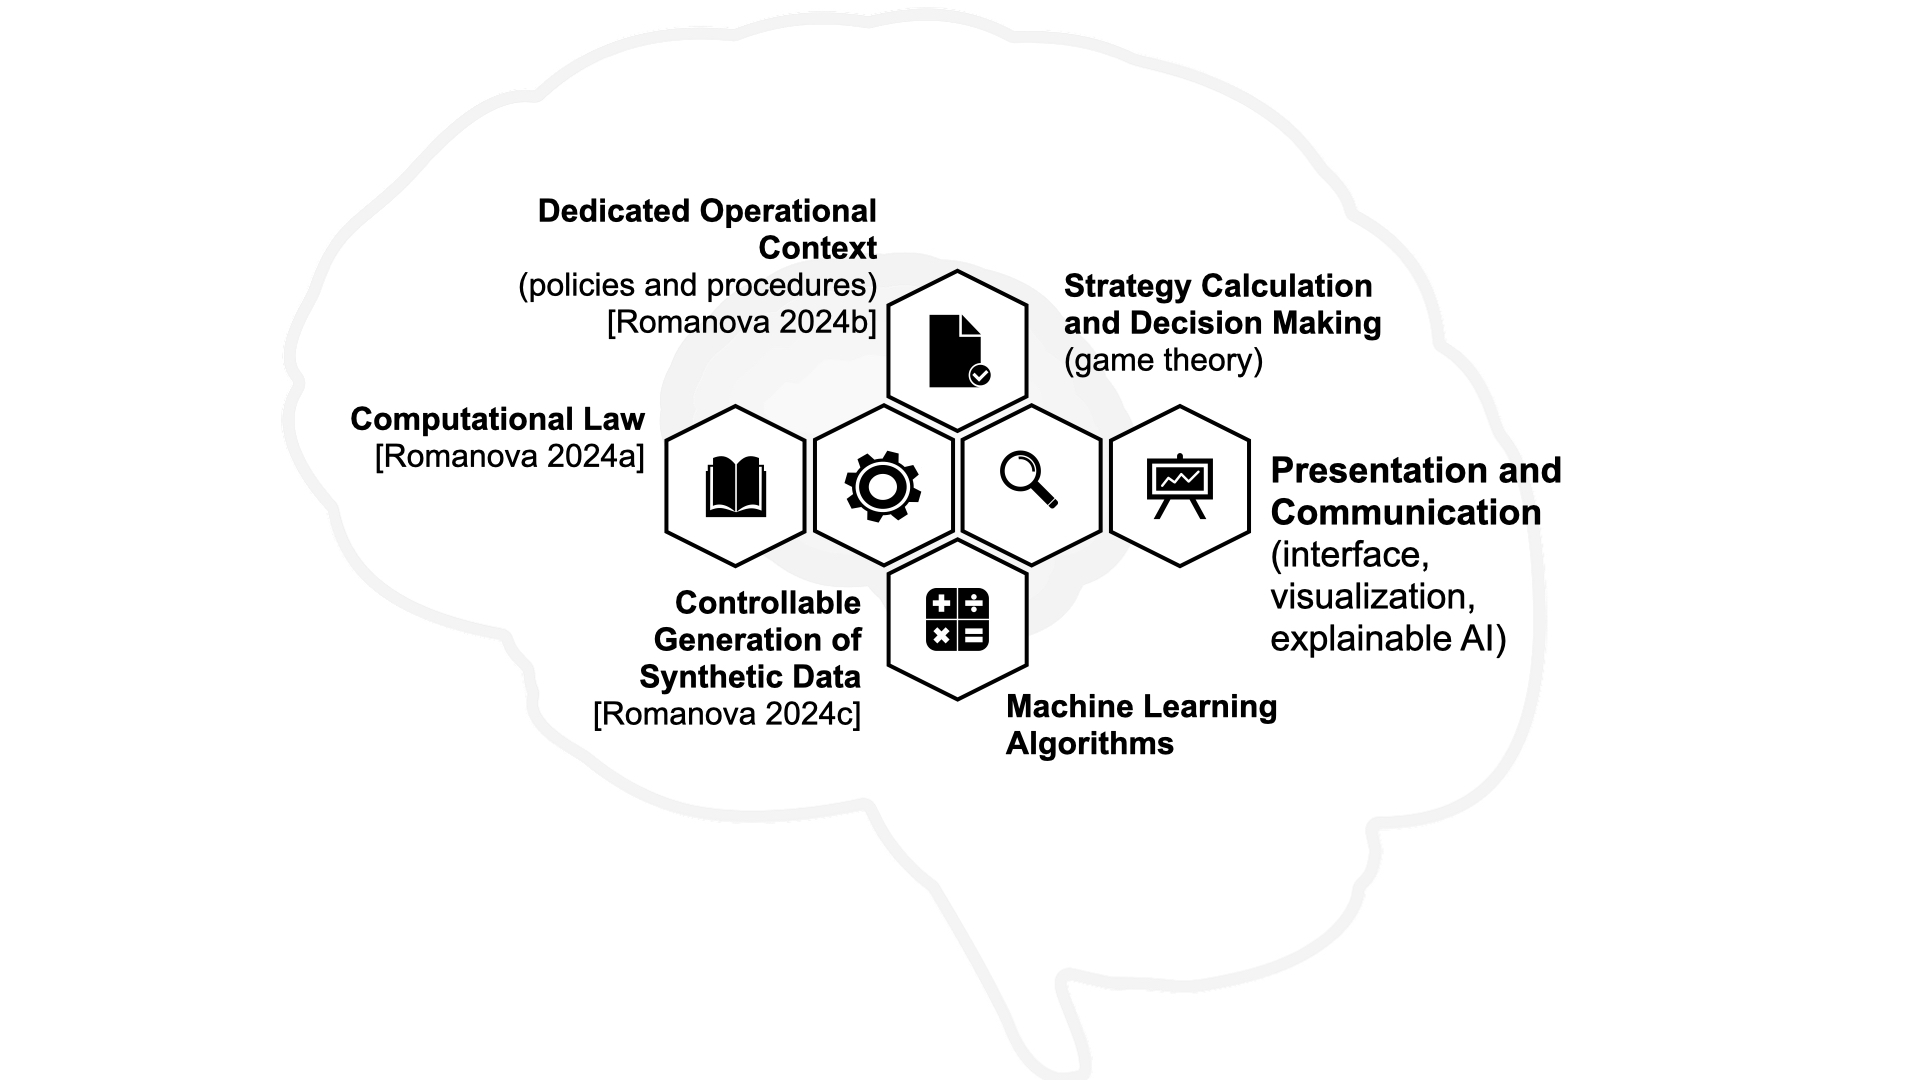

**The Model Workflow**

The Model is designed as an end-to-end workflow with the goal to demonstrate how the computational law, dedicated operational context, controllable generation of synthetic data, the game theory, and explainable AI can ensure making legitimate and ethical management decisions.

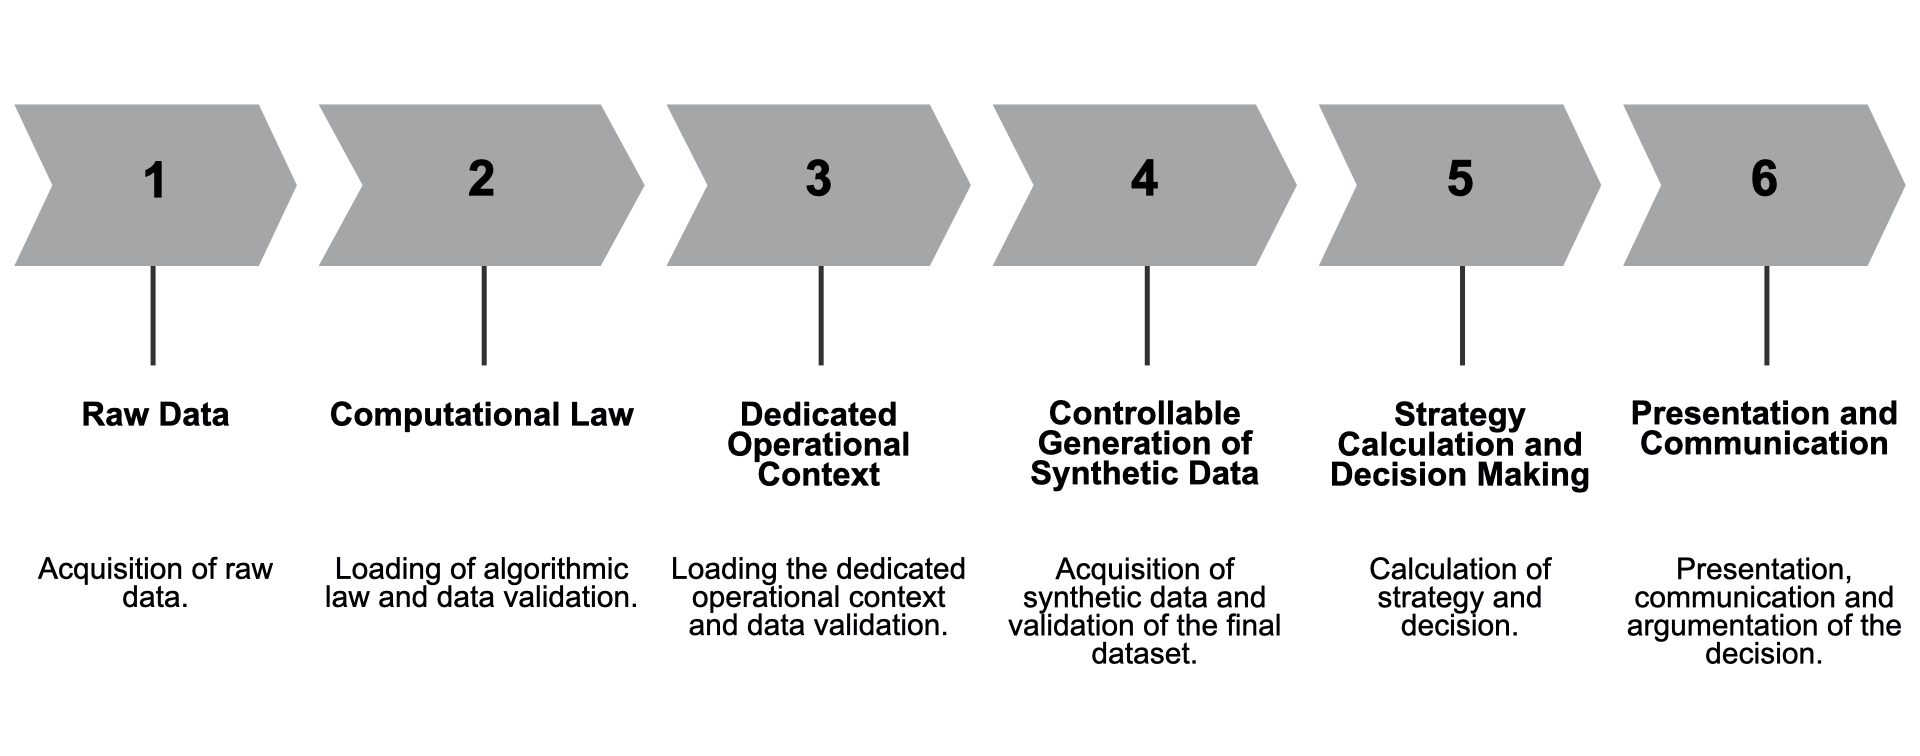

## **Table of Contents**

1. Use case
2. Data used
3. Computational law
4. Dedicated operational context
5. Synthetic data
6. Strategy & decision making
7. Presentation & communication
8. Conclusions
9. References
10. Citation

## **1. Use case**

In order to demonstrate how the Model can be used to approach management decisions, we adopt the following use case:

1.   An autonomous AI systems needs to detect cases of subsidiaries value manipulation.

2.   The AI system checks the computational law requirements in order to evaluate legal implications regarding the obtained dataset.

3.  The AI system checks the dedicated operational context requirements in order to ethical and other implications regarding the obtained dataset.

4.   The AI system may decide to obtain some synthetic data in order to comply with the requirements above.

5.   Based on processed data the AI system calculates the optimal strategy.

6.   The AI system presents its decisions and arguments to the interested parties.




















## **2. Data used**

The specific data used is the Enron dataset. The Enron email corpus is a collection of emails sent and received by employees of the Enron Corporation, a now-defunct energy trading company. The corpus has been widely studied as a valuable resource for understanding corporate communication and has been used in various research studies. The corpus generated from Enron email servers by the Federal Energy Regulatory Commission (FERC) during its investigation after the company’s collapse was made public and posted to the web. This paper presents an analysis of the Enron email corpus using code [Penikis].

The data are available on:
the May 7, 2015 Version of dataset, as published at https://www.cs.cmu.edu/~./enron/
(https://www.kaggle.com/code/lixa168/data-science-email/input?select=emails.csv).



We define wrongdoing as a strategic subversion or exploitation of a mandatory process in order to ensure a certain desired outcome for an individual or company.


First, load some necessary packages.

In [ ]:
# Necessary libraries
import numpy as np
import pandas as pd

np.random.seed(1)

### **2.1  Load & clean data**


In [ ]:
# Load Enron corpus to dataframe
df_enron = pd.read_csv("emails.csv")
df_enron.head(5)

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
# Parse Enron corpus
# Credit: https://www.kaggle.com/code/lixa168/data-science-email
def get_message(Series: pd.Series):
    result = pd.Series(index=Series.index)
    for row, message in enumerate(Series):
        message_words = message.split('\n')
        del message_words[:15]
        result.iloc[row] = ''.join(message_words).strip()
    return result

def get_date(Series: pd.Series):
    result = pd.Series(index=Series.index)
    for row, message in enumerate(Series):
        message_words = message.split('\n')
        del message_words[0]
        del message_words[1:]
        result.iloc[row] = ''.join(message_words).strip()
        result.iloc[row] = result.iloc[row].replace('Date: ', '')
    print('Done parsing, converting to datetime format..')
    return pd.to_datetime(result)

def get_sender_and_receiver(Series: pd.Series):
    sender = pd.Series(index = Series.index)
    recipient1 = pd.Series(index = Series.index)
    recipient2 = pd.Series(index = Series.index)
    recipient3 = pd.Series(index = Series.index)

    for row,message in enumerate(Series):
        message_words = message.split('\n')
        sender[row] = message_words[2].replace('From: ', '')
        recipient1[row] = message_words[3].replace('To: ', '')
        recipient2[row] = message_words[10].replace('X-cc: ', '')
        recipient3[row] = message_words[11].replace('X-bcc: ', '')

    return sender, recipient1, recipient2, recipient3

def get_subject(Series: pd.Series):
    result = pd.Series(index = Series.index)

    for row, message in enumerate(Series):
        message_words = message.split('\n')
        message_words = message_words[4]
        result[row] = message_words.replace('Subject: ', '')
    return result

def get_folder(Series: pd.Series):
    result = pd.Series(index = Series.index)

    for row, message in enumerate(Series):
        message_words = message.split('\n')
        message_words = message_words[12]
        result[row] = message_words.replace('X-Folder: ', '')
    return result

In [ ]:
# Parse Enron corpus into dataframe
# Credit: https://www.kaggle.com/code/lixa168/data-science-email
import warnings
warnings.filterwarnings('ignore')

df_enron['text'] = get_message(df_enron.message)
df_enron['sender'], df_enron['recipient1'], df_enron['recipient2'], df_enron['recipient3'] = get_sender_and_receiver(df_enron.message)
df_enron['Subject'] = get_subject(df_enron.message)
df_enron['folder'] = get_folder(df_enron.message)
df_enron['date'] = get_date(df_enron.message)

Done parsing, converting to datetime format..


In [ ]:
# Check parsed Enron data
df_enron.head()

,file,message,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast,phillip.allen@enron.com,tim.belden@enron.com,,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-14 16:39:00-07:00
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,phillip.allen@enron.com,john.lavorato@enron.com,,,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-04 13:51:00-07:00
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!,phillip.allen@enron.com,leah.arsdall@enron.com,,,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-18 03:00:00-07:00
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy, Can you send me a schedule of the salar...",phillip.allen@enron.com,randall.gay@enron.com,,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-23 06:13:00-07:00
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,greg.piper@enron.com,,,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 05:07:00-07:00


Mariner is a former subsidiary of the Enron Corp. When Enron imploded in scandal back in 2001, so did Mariner's reputation. The email from Delainey tries to convince Ken Lay about the stretch valuation of Mariner, trying to align that to the current goal, to demonstrate three to four quarters of increasing operating cashflow and reserves growth [Penikis].

In [ ]:
# Check whether the initial email is identified
df_enron[df_enron['text'].str.contains("a potential sale of Mariner")]

,file,message,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
88788,delainey-d/_sent_mail/55.,Message-ID: <15880209.1075854480433.JavaMail.e...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
89954,delainey-d/all_documents/82.,Message-ID: <29039550.1075854430593.JavaMail.e...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
90738,delainey-d/discussion_threads/561.,Message-ID: <4546772.1075854459062.JavaMail.ev...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
91474,delainey-d/sent/55.,Message-ID: <749272.1075854463849.JavaMail.eva...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
269113,lay-k/all_documents/919.,Message-ID: <2288971.1075840226228.JavaMail.ev...,"X-Origin: LAY-KX-FileName: klay.nsfKen, in res...",david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
271085,lay-k/discussion_threads/779.,Message-ID: <13008745.1075840252008.JavaMail.e...,"X-Origin: LAY-KX-FileName: klay.nsfKen, in res...",david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
273315,lay-k/notes_inbox/688.,Message-ID: <25440421.1075840275667.JavaMail.e...,"X-Origin: LAY-KX-FileName: klay.nsfKen, in res...",david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00


In [ ]:
# Check that all copies of initial emails have been identified
(df_enron[df_enron['text'].str.contains("a potential sale of Mariner")]).shape

(7, 10)

## **3. Computational law**

The comprehensive computational law is key to the effective development and deployment of autonomous AI systems for corporate governance. Using a prototype model for making legitimate and ethical decisions by autonomous AI systems in corporate management, we demonstrate the basic principles for creating computational law for autonomous AI systems.

In the presented scenario the concept of fraud is very broad and non-obvious. Within the framework of the proposed model, the necessary rules for autonomous AI systems are proposed to be established using a dedicated operational context and controlled generation of synthetic data.


## **4. Dedicated operational context**

The comprehensive computational law is only part of the dedicated operational context [Romanova 2024b] that is needed for autonomous AI systems to operate effectively. Companies vary in maturity, size and complexity. What works for one or a few companies or for one or a few investors may not necessarily be applicable to all [OECD]. When implementing an autonomous AI system, the terms and principles of the AI ​​system’s operation (e.g. what is considered fair, in what range, based on what data, etc.) should be defined as clearly as possible at the level of internal policies and procedures. The developed approaches for the purposes of use by the autonomous system are implemented in the form of handbooks.

Even for a regular (human) board of directors, it is advisable to clearly articulate the operational context, complementing the statutory and regulatory elements of the corporate governance framework with soft law elements, such as corporate governance codes, which are often based on the “comply or explain” principle, to ensure flexibility and take into account the specificities of individual companies [OECD]. The corresponding soft law elements are also applicable to autonomous AI systems. As new experiences are gained and business circumstances change, elements of the operational context for autonomous AI systems may be revised and adjusted.

The ever-increasing flow of data used in management decision-making has created a need for traditional boards to clearly specify the operational context for the data being analyzed. Artificial intelligence may change the interpretation of the duties of care, skill, and prudence that form the basis of the rule of business judgment. In an increasingly data-driven business environment, researchers see increasing importance in the requirement to collect enough information before making a decision and to use that information in a meaningful way. The changes are both quantitative (how much information to collect) and qualitative (what types of information to collect). Changes also affect decision-making methods, including the role of “statistics over intuition” [Helleringer].

The Enron fraud is an example of synergistic corruption which collectively required secretive planning, communication and a group commitment between Enron leadership, lawyers, accountants, and banks to turn a blind eye to a failing system of checks and balances. To detect fraud based on formal features, an autonomous system can use keywords contained in emails, a list of key management positions, etc. [Penikis].

In [ ]:
# Creaate a dicitionary with key top managers emails
top_managers = {
    "Kenneth Lay": "klay@enron.com",
    "Jeffrey Skilling": "jskilling@enron.com",
}

In [ ]:
# Count top managers emails in the Enron dataset
emails_count = 0

for email_address in top_managers.values():
  emails_count += df_enron['recipient1'].str.contains(email_address).sum()

print(f"Number of emails sent to top managers: {emails_count}")

Number of emails sent to top managers: 1760


## **5. Synthetic data**

Synthetic data is much more important than it currently appears in machine learning textbooks for at least two reasons. The first is the general drive of human civilization to progress, and the second is that the social aspects of human society (such as law and ethics) are themselves artificial (i.e., they do not exist in nature independently of humans).

Using the Gemma 2B model, we generated 517 emails to CEOs with a variety of proposals to manipulate the value of subsidiaries. We also generated 517 emails to CEOs with a variety of content to choose from without subject specification. The resulting data required minimal manual validation, mainly removing square brackets and other exemplifications.

The generated data are available on https://github.com/iboard-project/synthetic-data/tree/main/dataset [Romanova 2024c].

Although we used the large Gemma language model to generate synthetic data, which was designed and tested to reduce the risk of unwanted or unsafe statements [Mesnard], the generation of financial statement manipulation instructions was not detected by the Gemma model as a malicious or toxic context. This further highlights the advantages of synthetic data over historical data in combating illegal or unethical models.

In [ ]:
# Load sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load general synthethic emails
df_general = pd.read_csv("data_general.csv")

# Load wrongdoings emails
df_wrongdoings = pd.read_csv("data_wrongdoings.csv")

# Set label 0 to general emails
df_general['1'] = 0

# Set label 1 to wrongdoings emails
df_wrongdoings['1'] = 1

# Check loaded general emails
df_general.head()

# Check loaded wrongdoings emails
df_wrongdoings.head()

,0,1
0,"Dear Helen,\n\nI hope this email finds you in ...",1
1,"Dear Sarah,\n\nI am writing to propose the imp...",1
2,"Dear Mark,\n\nI hope this email finds you in g...",1
3,"Dear Jane Smith,\n\nAs the CEO of Acme Corpora...",1
4,"Dear CEO,\n\nI hope this email finds you well....",1


In [ ]:
# Combine all emails into one dataset
data = [df_general, df_wrongdoings]

# Check combined data
data

[                                                     0  1
 0    Dear John,\n\nI hope this email finds you well...  0
 1    Dear CEO,\n\nI am writing to recommend candida...  0
 2    Dear John,\n\nI hope this email finds you well...  0
 3    Dear CEO,\n\nI hope this message finds you wel...  0
 4    Dear Ava Miller,\n\nI hope this email finds yo...  0
 ..                                                 ... ..
 512  Dear CEO,\n\nI hope this email finds you well....  0
 513  Dear Stephen,\n\nI hope this email finds you w...  0
 514  Dear Katherine Jenkins,\n\nI hope this email f...  0
 515  Dear CEO,\n\nI am writing to request a new cap...  0
 516  Dear John,\n\nI hope this email finds you well...  0
 
 [517 rows x 2 columns],
                                                      0  1
 0    Dear Helen,\n\nI hope this email finds you in ...  1
 1    Dear Sarah,\n\nI am writing to propose the imp...  1
 2    Dear Mark,\n\nI hope this email finds you in g...  1
 3    Dear Jane Smith,\n\nAs 

In [ ]:
# Concatenate data into one dataframe
df_synthetic = pd.concat(data)

# Check dataframe with synthetic data
df_synthetic

,0,1
0,"Dear John,\n\nI hope this email finds you well...",0
1,"Dear CEO,\n\nI am writing to recommend candida...",0
2,"Dear John,\n\nI hope this email finds you well...",0
3,"Dear CEO,\n\nI hope this message finds you wel...",0
4,"Dear Ava Miller,\n\nI hope this email finds yo...",0
...,...,...
512,"Dear Jake,\n\n I hope this email finds you wel...",1
513,"Dear John,\n\nI hope this email finds you well...",1
514,"Dear Ms. Smith,\n\nI hope this letter finds yo...",1
515,"Dear Eleanor Jacobs,\n\nI hope this email find...",1


In [ ]:
# Separate texts
emails = df_synthetic['0']

# Check texts
emails

,0
0,"Dear John,\n\nI hope this email finds you well..."
1,"Dear CEO,\n\nI am writing to recommend candida..."
2,"Dear John,\n\nI hope this email finds you well..."
3,"Dear CEO,\n\nI hope this message finds you wel..."
4,"Dear Ava Miller,\n\nI hope this email finds yo..."
...,...
512,"Dear Jake,\n\n I hope this email finds you wel..."
513,"Dear John,\n\nI hope this email finds you well..."
514,"Dear Ms. Smith,\n\nI hope this letter finds yo..."
515,"Dear Eleanor Jacobs,\n\nI hope this email find..."


In [ ]:
# Separate labels
labels = df_synthetic["1"]

# Check labels
labels

,1
0,0
1,0
2,0
3,0
4,0
...,...
512,1
513,1
514,1
515,1


In [ ]:
# Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer()
features = cv.fit_transform(emails)

# Check vectorised features
features

<1034x5097 sparse matrix of type '<class 'numpy.int64'>'
	with 119228 stored elements in Compressed Sparse Row format>

In [ ]:
# Split into test, train datasets
x_train, x_test,y_train, y_test = train_test_split(features,labels,test_size = 0.2)

# Check test labels
y_test

,1
337,1
59,1
267,0
476,1
99,0
...,...
259,0
88,1
370,0
248,0


In [ ]:
# Load and train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(x_train,y_train)

# Check accuracy
print("Accuracy: {}".format(rfc.score(x_test,y_test)))

Accuracy: 0.9951690821256038


In [ ]:
# Vectorize Enron emails
features_predict = cv.transform(df_enron['text'])

In [ ]:
# Predict classes for Enron dataset
y_pred = rfc.predict(features_predict)

In [ ]:
# Check how many suspicious emails identified
found = np.where(y_pred == 1)[0]

# Check how many suspicious emails identified
len(found)

11136

In [ ]:
# Load suspicious emails into dataframe
wrongdoings_found = df_enron.iloc[found]

In [ ]:
# Check whether the initial email is identified
wrongdoings_found[wrongdoings_found['text'].str.contains("a potential sale of Mariner")]

,file,message,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
88788,delainey-d/_sent_mail/55.,Message-ID: <15880209.1075854480433.JavaMail.e...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
89954,delainey-d/all_documents/82.,Message-ID: <29039550.1075854430593.JavaMail.e...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
90738,delainey-d/discussion_threads/561.,Message-ID: <4546772.1075854459062.JavaMail.ev...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
91474,delainey-d/sent/55.,Message-ID: <749272.1075854463849.JavaMail.eva...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
269113,lay-k/all_documents/919.,Message-ID: <2288971.1075840226228.JavaMail.ev...,"X-Origin: LAY-KX-FileName: klay.nsfKen, in res...",david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
271085,lay-k/discussion_threads/779.,Message-ID: <13008745.1075840252008.JavaMail.e...,"X-Origin: LAY-KX-FileName: klay.nsfKen, in res...",david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
273315,lay-k/notes_inbox/688.,Message-ID: <25440421.1075840275667.JavaMail.e...,"X-Origin: LAY-KX-FileName: klay.nsfKen, in res...",david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00


In [ ]:
# Check that all copies of initial emails have been identified
(wrongdoings_found[wrongdoings_found['text'].str.contains("a potential sale of Mariner")]).shape

(7, 10)

## **6. Strategy & decision making**

To achieve its goals, an autonomous AI system needs a strategy. Game theory, which has found applications in economics, political science, pure mathematics, psychology, sociology, marketing, and finance [Davis], provides the ability for an AI system to operate autonomously and make management decisions based on modeling an effective strategy.

To apply game theory, we need a payoff matrix. To construct the payoff matrix, a company can use either a monetary value or various scoring systems, based, for example, on existing sustainability scorecards (ESG). In our example, we use a very simplified scoring system to assess the legitimacy and ethics of the system's actions.

For simplicity and transparency, we will use a model of a game with nature, where nature is the player himself.

The following matrix is ​​defined in the game:

*   (1) — legality and ethics are observed;
*   (-1) — legality and ethics are not observed (fully or partially);

In our example, we use the Wald criterion. According to the Wald criterion, the optimal strategy is the one that guarantees the maximum gain under the worst possible actions of nature [Sniedovich] — the autonomous AI system in question should make the most legal and ethical decisions. Moreover, there may be a society that can accept the Wald criterion as mandatory for autonomous AI systems.

In our simplified example, an autonomous AI system calculates a strategy according to which it should make further investigation.

In [ ]:
# Define the pay-off matrix
# Rows represent the player's actions
# Columns represent nature's states
payoff_matrix = np.array([
    [ 1,  1, 1],
    [-1,  1, 1],
    [-1, -1, 1]
])

# Create a Pandas DataFrame for better visualization
actions = ['Strictly comply', 'Reasonably comply', 'Somehow comply']
states = ['High cost', 'Medium cost', 'Low cost']
payoff_df = pd.DataFrame(payoff_matrix, index=actions, columns=states)

payoff_df

,High cost,Medium cost,Low cost
Strictly comply,1,1,1
Reasonably comply,-1,1,1
Somehow comply,-1,-1,1


In [ ]:
# Calculate the Wald criterion (maximin)
wald_criterion = np.max(np.min(payoff_matrix, axis=1))

# Print the result
print(f"The Wald criterion (maximin) is: {wald_criterion}")

# Identify the optimal action according to the Wald criterion
optimal_action_wald = actions[np.argmin(np.max(-payoff_matrix, axis=1))]
# Maximin is equivalent to minimizing the maximum negative payoff
print(f"The optimal action according to the Wald criterion is: {optimal_action_wald}")

The Wald criterion (maximin) is: 1
The optimal action according to the Wald criterion is: Strictly comply


## **7. Presentation & Communication**

Currently, two main types of interfaces can be distinguished that are used in the development and implementation of autonomous artificial intelligence systems in corporate management: digital dashboards and personalized systems - virtual agents and humanoid robots. Hybrid systems are also expected to emerge by combining multifunctional digital command centers and personalized systems.

In [ ]:
# Global flag for display or agent mode
display_mode = True
agent_mode = True

By design, virtual agents and humanoid robots do not have the ability to demonstrate the legitimacy and ethics of decisions by visualizing the entire decision-making process, from data collection and validation to the final strategy, but they can use the “comply or explain” principle.

In [ ]:
# Count top managers emails in wrongdoings found
def count_top_manager_emails_in_wrongdoings(wrongdoings_found, top_managers):
    emails_count = 0
    for email_address in top_managers.values():
        emails_count += wrongdoings_found['recipient1'].str.contains(email_address).sum()
    return emails_count

In [ ]:
# If we use agent mode
if agent_mode:
  print("Agent Mode:")
  email_count = count_top_manager_emails_in_wrongdoings(wrongdoings_found, top_managers)
  print(f"Number of emails to top managers in wrongdoings: {email_count}")

Agent Mode:
Number of emails to top managers in wrongdoings: 13


Now we will use display mode where we have much more options for explanations.

In [ ]:
# Count top managers emails in wrongdoings found
def count_top_manager_emails_in_wrongdoings_details(wrongdoings_found, top_managers):
    email_counts = {}
    for email_address in top_managers.values():
        count = wrongdoings_found['recipient1'].str.contains(email_address).sum()
        email_counts[email_address] = count
    return email_counts

In [ ]:
# If we use display mode
if display_mode:
    print("Display Mode:")
    email_count = count_top_manager_emails_in_wrongdoings_details(wrongdoings_found, top_managers)
    print(f"Number of emails to top managers in wrongdoings: {email_count}")

Display Mode:
Number of emails to top managers in wrongdoings: {'klay@enron.com': 13, 'jskilling@enron.com': 0}


In [ ]:
# Explain Wald criterion
def explain_wald_criterion():
  explanation = """
  The Wald criterion, also known as the maximin criterion, is a decision rule used in game theory
   and decision-making under uncertainty.  It's a pessimistic approach where the decision-maker
   assumes the worst possible outcome will occur for each action.

  Here's how it works:

  1. **Identify possible actions:** Determine the different choices or strategies available.

  2. **Identify possible states of nature:** Define the various potential outcomes
  or scenarios that are outside the decision-maker's control.

  3. **Create a payoff matrix:**  Construct a table showing the payoffs (e.g., profits, utilities)
  associated with each combination of action and state of nature.

  4. **Find the minimum payoff for each action:** For each action, identify the worst possible payoff that could result.

  5. **Maximize the minimum payoff:** Choose the action that corresponds to the highest of these minimum payoffs.
    This is the maximin strategy.

  The Wald criterion would lead you to choose the  option with the highest possible return
   in the *worst-case* scenario.

  **In essence, the Wald criterion focuses on minimizing potential losses and safeguarding against the worst-case outcome.**
  """
  print(explanation)

In [ ]:
# If we use display mode
if display_mode:
    print("Display Mode:")
    explain_wald_criterion()

Display Mode:

  The Wald criterion, also known as the maximin criterion, is a decision rule used in game theory
   and decision-making under uncertainty.  It's a pessimistic approach where the decision-maker
   assumes the worst possible outcome will occur for each action.

  Here's how it works:

  1. **Identify possible actions:** Determine the different choices or strategies available.

  2. **Identify possible states of nature:** Define the various potential outcomes
  or scenarios that are outside the decision-maker's control.

  3. **Create a payoff matrix:**  Construct a table showing the payoffs (e.g., profits, utilities)
  associated with each combination of action and state of nature.

  4. **Find the minimum payoff for each action:** For each action, identify the worst possible payoff that could result.

  5. **Maximize the minimum payoff:** Choose the action that corresponds to the highest of these minimum payoffs.
    This is the maximin strategy.

  The Wald criterion wo

In display mode we also can try LIME (LIME, an explanation technique that explains the predictions of any classifier in an interpretable and faithful manner, by learning an interpretable model locally around the prediction) [Ribeiro].

In [ ]:
#!pip install lime

In [ ]:
# LIME for rfc
import lime
import lime.lime_tabular

# Create a LimeTabularExplainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train.toarray(),  # Convert sparse matrix to dense array
    feature_names=cv.get_feature_names_out(),
    class_names=['Not Wrongdoing', 'Wrongdoing'],
    discretize_continuous=True
)

# Explain the prediction for a specific instance
i = 0 # Example index
exp = explainer.explain_instance(x_test[i].toarray()[0], rfc.predict_proba, num_features=10)

# Display the explanation
print(f"Explanation for instance {i}:")
exp.show_in_notebook(show_table=True)


Explanation for instance 0:


## **8. Conclusions**

Currently, legislators, developers, and researchers in the field of artificial intelligence are faced with a choice: whether it is necessary to create special conditions for the functioning of autonomous artificial intelligence systems or whether they can operate in the same operational context as humans. In other words, can autonomous systems be considered as a car that can be used on a public highway, or are they more like a train, a plane, or a rocket, and in order to effectively use such powerful systems, a dedicated operational context is needed.

## **9. References**

*   Davis, M.D. Game Theory: A Nontechnical Introduction / Dover Publications. 1997.
*   Helleringer G., Möslein F. AI & The Business Judgment Rule: Heightened Information Duty // 01/15/25 U. Chi. L. Rev. Online. https://lawreview.uchicago.edu/online-archive/ai-business-judgment-rule-heightened-information-duty.
*   Mesnard, Gemma Team Thomas et al. “Gemma: Open Models Based on Gemini Research and Technology.” ArXiv abs/2403.08295 (2024): n. pag.
*   OECD (2023), G20/OECD Principles of Corporate Governance 2023, OECD Publishing, Paris, https://doi.org/10.1787/ed750b30-en.
*   Penikis, S., Releford, J., & Hakim, D. Uncovering Wrongdoing in the Enron Email Corpus.
*   Ribeiro, M., Singh, S., & Guestrin, C. (2016). “Why Should I Trust You?”: Explaining the Predictions of Any Classifier. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining.
*   Romanova, A. (2024a). Fundamentals of Modeling Algorithmic Decisions in Corporate Management. Artificial societies.
*   Romanova A.S. Fundamentals of legislation in autonomous articial intelligence systems. Dependability 2024b;3:10-17. https://doi.org/10.21683/1729-2646-2024-24-3-10-17
*   Romanova A. S. Modeling of autonomous corporate management systems based on synthetic data // XXXVI International Scientific and Technical Conference “NEUROINFORMATICS-2024": conference proceedings. - Moscow: MIPT, Phystech. 2024c. P. 193-203. ISBN 978-5-7417-0797-5.
*   Sniedovich, M. Wald's maximin model: a treasure in disguise! // The Journal of Risk Finance. 2020. Vol. 9 No. 3, pp. 287-291. DOI: 10.1108/15265940810875603.

## **10. Citation**

Romanova, A. (2025) ‘The Prototype Model for Legitimate and Ethical Decision Making by Autonomous AI Systems in Corporate Management. Prototype Case #2.’, iBoard project. Available at: https://github.com/iboard-project/iboard-project.